# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [46]:
df = pd.read_csv('../data/bikes_rent.csv.gz', compression='gzip')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

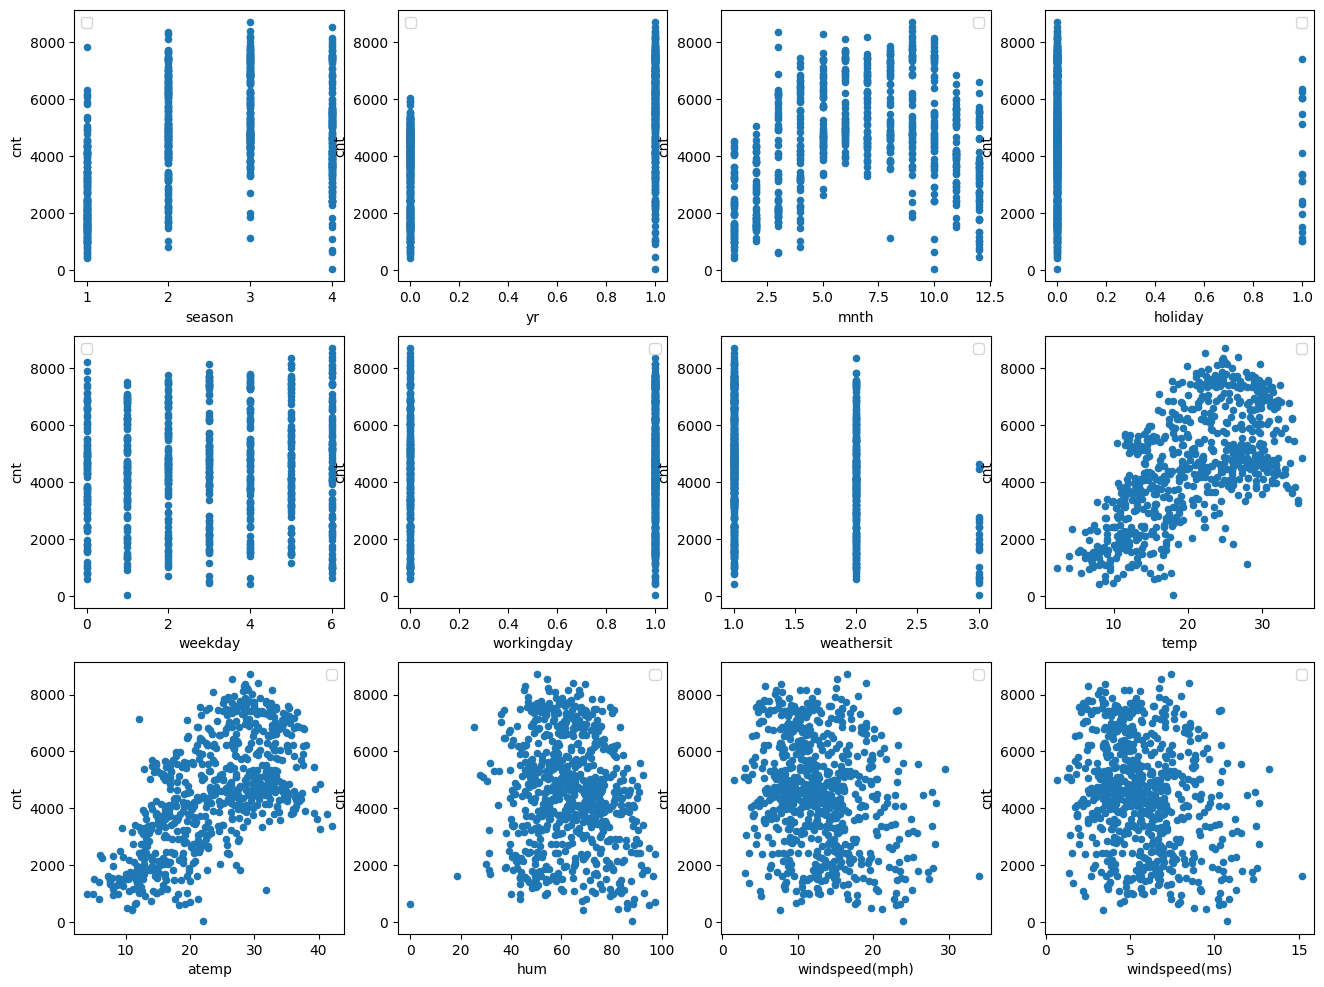

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: нелинейный (переменные зависимы друг от друга, но непропорционально)

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: temp и atemp (температура фактическая и по ощущениям)

## 2. Корреляционная матрица 

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ

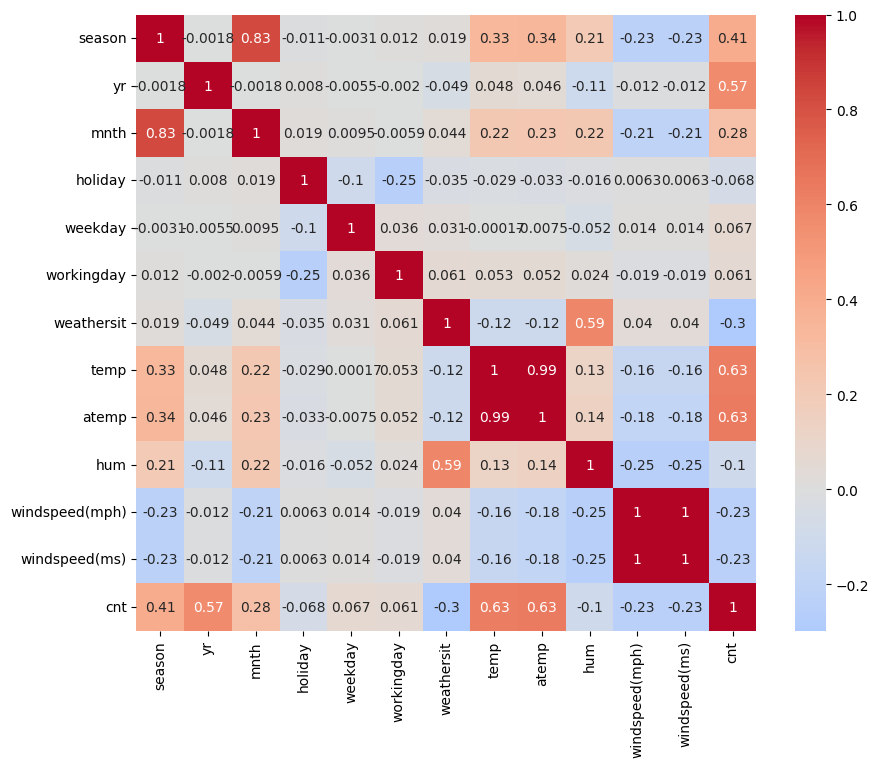

Наименьшая корреляция с количеством прокатов:
workingday    0.061156
weekday       0.067443
holiday       0.068348
hum           0.100659
Name: cnt, dtype: float64

Наибольшая корреляция с количеством прокатов:
atemp     0.631066
temp      0.627494
yr        0.566710
season    0.406100
Name: cnt, dtype: float64


In [49]:
# Корреляционная матрица
corr_matrix = df.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()


rentals_corr = corr_matrix["cnt"].drop("cnt")

# Признаки с наименьшей корреляцией
lowest_corr = rentals_corr.abs().nsmallest(4)

# Признаки с наибольшей корреляцией
highest_corr = rentals_corr.abs().nlargest(4)

print("Наименьшая корреляция с количеством прокатов:")
print(lowest_corr)

print("\nНаибольшая корреляция с количеством прокатов:")
print(highest_corr)

## 3. Barpot 

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: года всего 2, а максимальное значение (по месяцам) года 0 меньше, чем третье снизу года 1

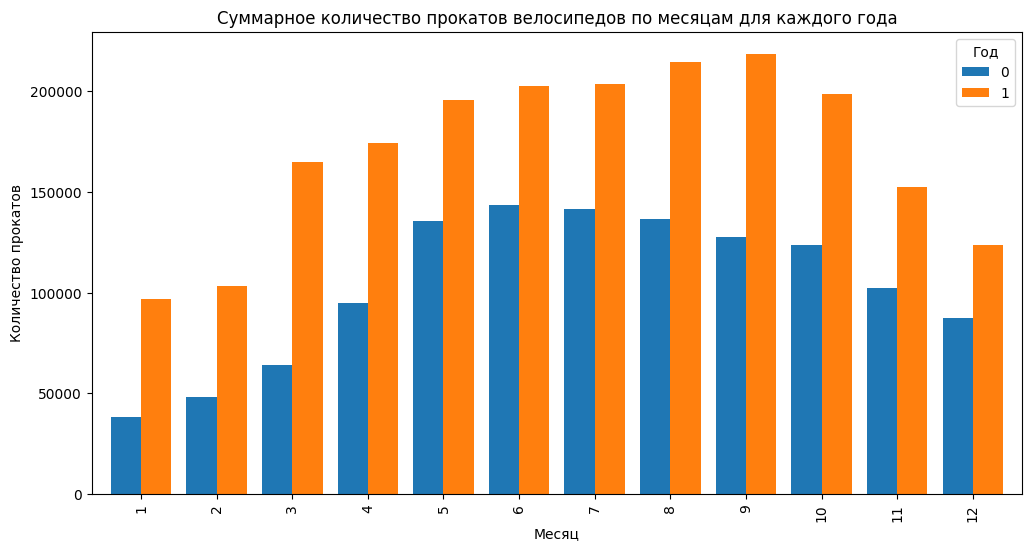

In [50]:
monthly_rentals = df.groupby(['yr', 'mnth'])['cnt'].sum().unstack('yr')

# Построение bar-графика
monthly_rentals.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title("Суммарное количество прокатов велосипедов по месяцам для каждого года")
plt.xlabel("Месяц")
plt.ylabel("Количество прокатов")
plt.legend(title="Год")
plt.show()

## 4. Countplot 

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: количество взятых в проках велосипедов за 2 года, разбитых по датам, совместили с метеорологическими наблюдениями и производственным календарём за тот же период
    
Ответ: равномернное

C:\Users\Simon\AppData\Local\Temp\ipykernel_7108\2801702626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday', data=df, palette='viridis')


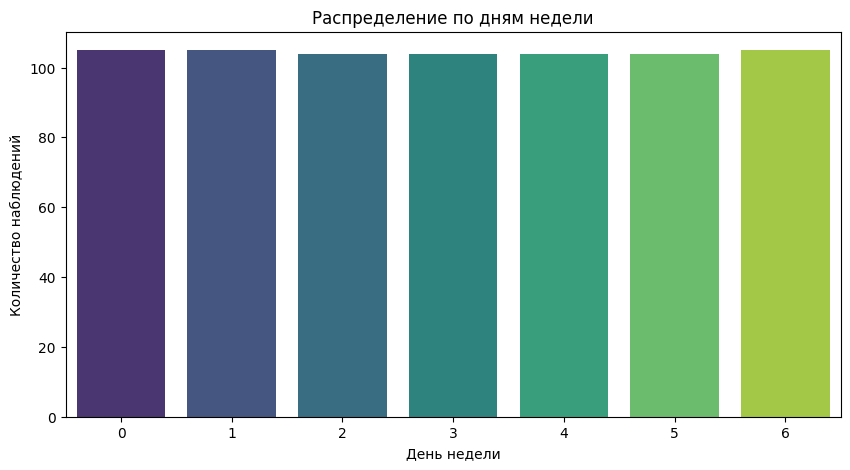

C:\Users\Simon\AppData\Local\Temp\ipykernel_7108\2801702626.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=df, palette='viridis')


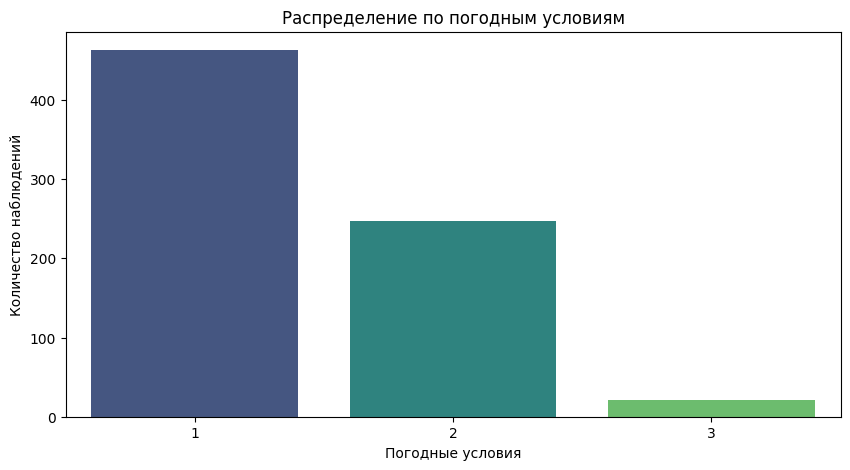

In [51]:
# Построение countplot для признака "weekday"
plt.figure(figsize=(10, 5))
sns.countplot(x='weekday', data=df, palette='viridis')
plt.title('Распределение по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество наблюдений')
plt.show()

# Построение countplot для признака "weathersit"
plt.figure(figsize=(10, 5))
sns.countplot(x='weathersit', data=df, palette='viridis')
plt.title('Распределение по погодным условиям')
plt.xlabel('Погодные условия')
plt.ylabel('Количество наблюдений')
plt.show()

## 5. Распределение 

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: около 4 500

Ответ: допустим, что нормальное

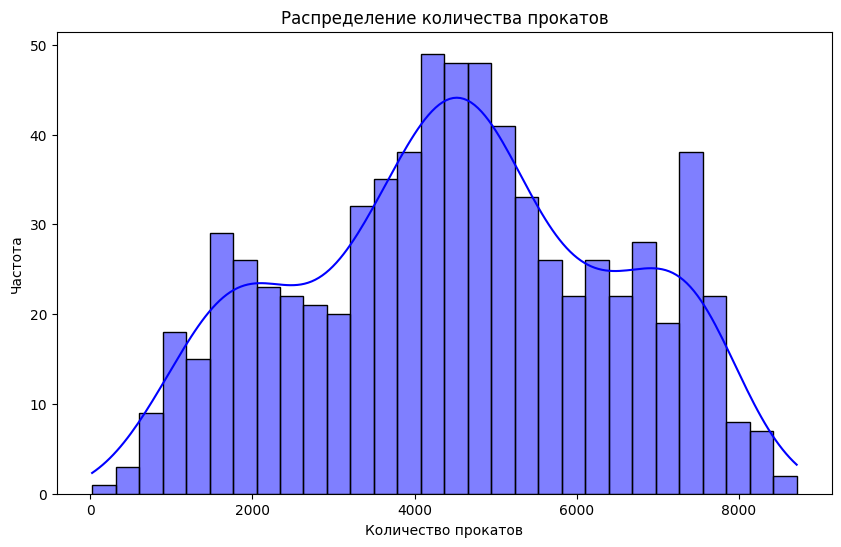

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True, color='blue', bins=30)
plt.title('Распределение количества прокатов')
plt.xlabel('Количество прокатов')
plt.ylabel('Частота')
plt.show()

## 6. Совместное распределение признаков 

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: кроме выброса с реальной температурой 30' и ощущаемой 15' - нет, но мы здесь не учитываем погоду и ветер

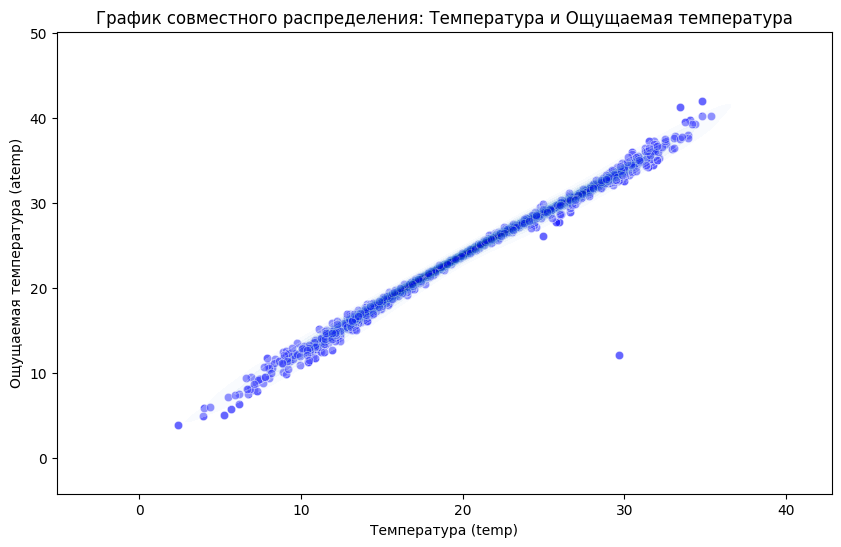

In [53]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='atemp', data=df, color='blue', alpha=0.6)

sns.kdeplot(x='temp', y='atemp', data=df, cmap='Blues', fill=True, alpha=0.3)

plt.title('График совместного распределения: Температура и Ощущаемая температура')
plt.xlabel('Температура (temp)')
plt.ylabel('Ощущаемая температура (atemp)')
plt.show()

## 7. Ящик с усами 

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: можно свести на погрешность. Возможно, в августе и декабре приятнее гулять пешком и наслаждаться природой, а велосипед использовать как средство перемещения до работы и обратно.

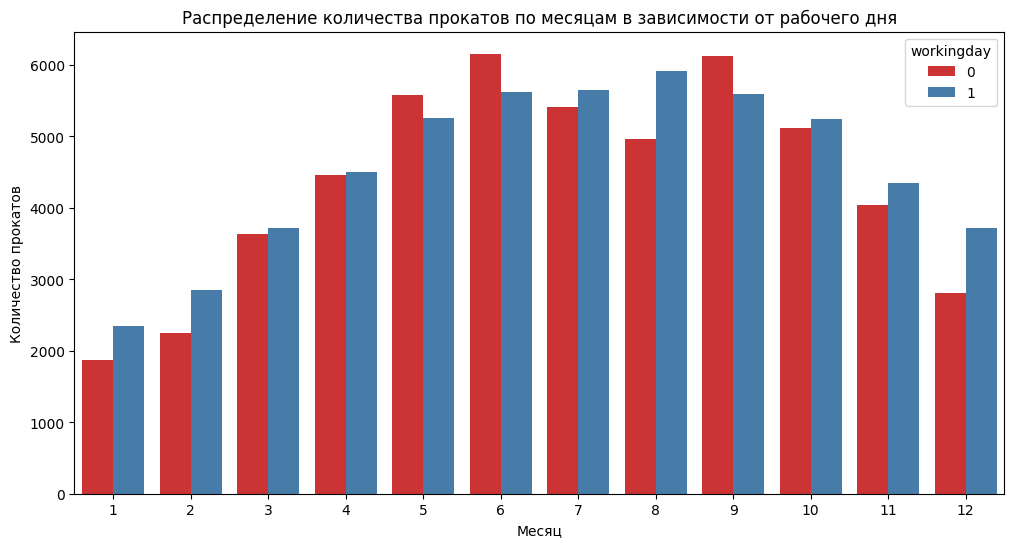

In [54]:
monthly_working_rentals = df.groupby(['mnth', 'workingday'])['cnt'].mean().reset_index()

# bar-график
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', hue='workingday', data=monthly_working_rentals, palette='Set1')

plt.title('Распределение количества прокатов по месяцам в зависимости от рабочего дня')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.show()

## 8. Хитрый вопрос 

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: увеличение скорость ветра увеличивает испарение жидкостей с кожи и одежды, т.к. это процесс энергозатратный, то логично предположить, что чем сильнее ветер, тем холоднее. Грфик, однако, опровергает эту теорию 

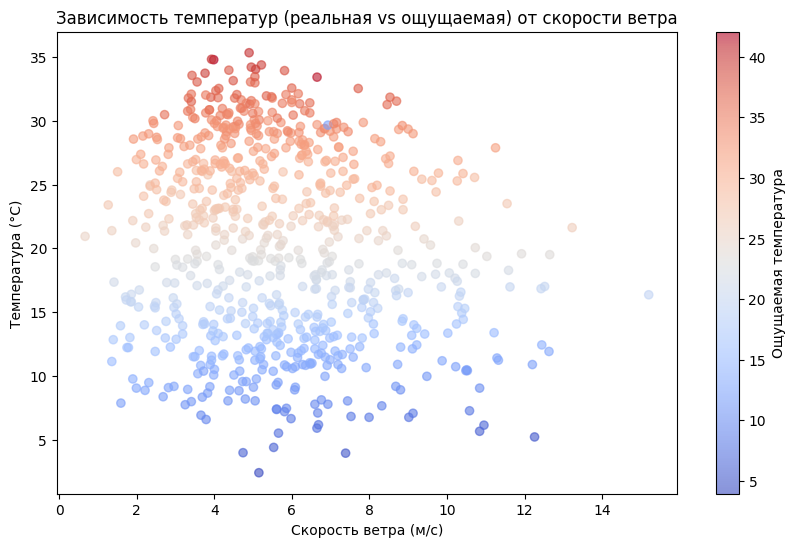

In [55]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(df['windspeed(ms)'], df['temp'], c=df['atemp'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Ощущаемая температура')

plt.title('Зависимость температур (реальная vs ощущаемая) от скорости ветра')
plt.xlabel('Скорость ветра (м/с)')
plt.ylabel('Температура (°C)')
plt.show()

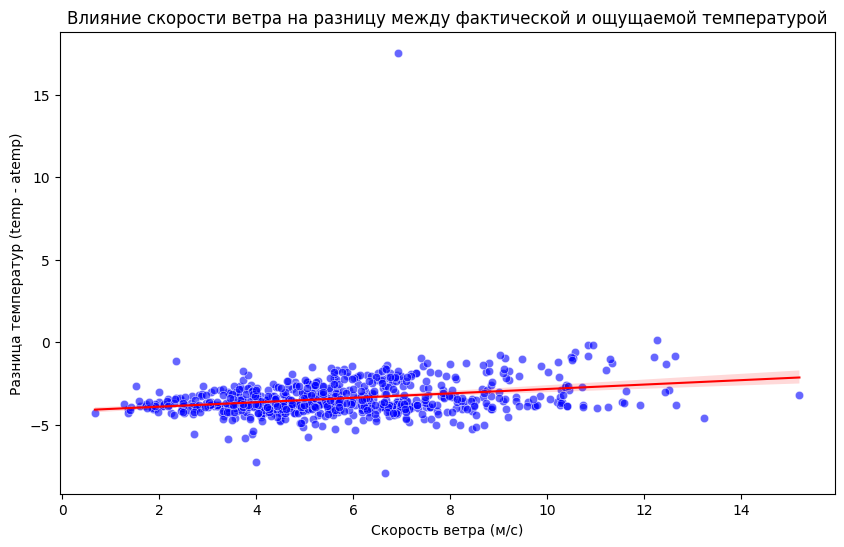

In [56]:
df['temp_diff'] = df['temp'] - df['atemp']

# Построение графика зависимости разницы температур от скорости ветра
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed(ms)', y='temp_diff', data=df, alpha=0.6, color='blue')
sns.regplot(x='windspeed(ms)', y='temp_diff', data=df, scatter=False, color='red', line_kws={"lw":1.5})

plt.title('Влияние скорости ветра на разницу между фактической и ощущаемой температурой')
plt.xlabel('Скорость ветра (м/с)')
plt.ylabel('Разница температур (temp - atemp)')
plt.show()